In [95]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import scipy.optimize as opt
import statistics as st

# font = {'family' : 'normal',
# 'weight' : 'normal',
# 'size' : 18}
# matplotlib.rc('font', **font)

# Лабораторная работа №1
##### Ребрий Лидия Б02-307

#### Поиск

Общий вид функции исследования времени поиска:

<font size=1>

```cpp
void experiment_of_function(int long long N, std::string name, bool arr_sort, bool worst){

    int long long *arr = new int long long[N];

    unsigned long long seed = time(0);
    std:: default_random_engine rng(seed);
    std:: uniform_int_distribution <int long long> dstr(-1e10, 1e10); // пределы целых чисел в массиве - (-1e10, 1e10)
    for (unsigned counter = N; counter != 0; --counter)
        arr[counter] = dstr(rng);
    if (arr_sort){
        sort(arr, N);
    }

    std:: default_random_engine rng0(2*seed);
    std:: uniform_int_distribution <unsigned long long> dstr0(0, N-1);
    for (unsigned counter = 100; counter != 0; --counter){ // делаем по 100 измерений времени
        auto begin = std:: chrono :: steady_clock :: now();
        for (unsigned cnt = 1000; cnt != 0; --cnt) // значение 1000 меняется в зависимости от функции
        // ========= функция - меняется от эксперимента ===================================
            liner_finer(arr, N, arr[dstr0(rng0)]+ worst*3*1e10);
        // ================================================================================
        auto end = std:: chrono :: steady_clock :: now();
        auto time_span = std:: chrono :: duration_cast<std:: chrono :: milliseconds >(end - begin);
        auto time = time_span.count();
            
        std::ofstream out;
        out.open(name, std::ios::app);
        out << N << ";" << time << std:: endl;
        out.close(); 
}
```

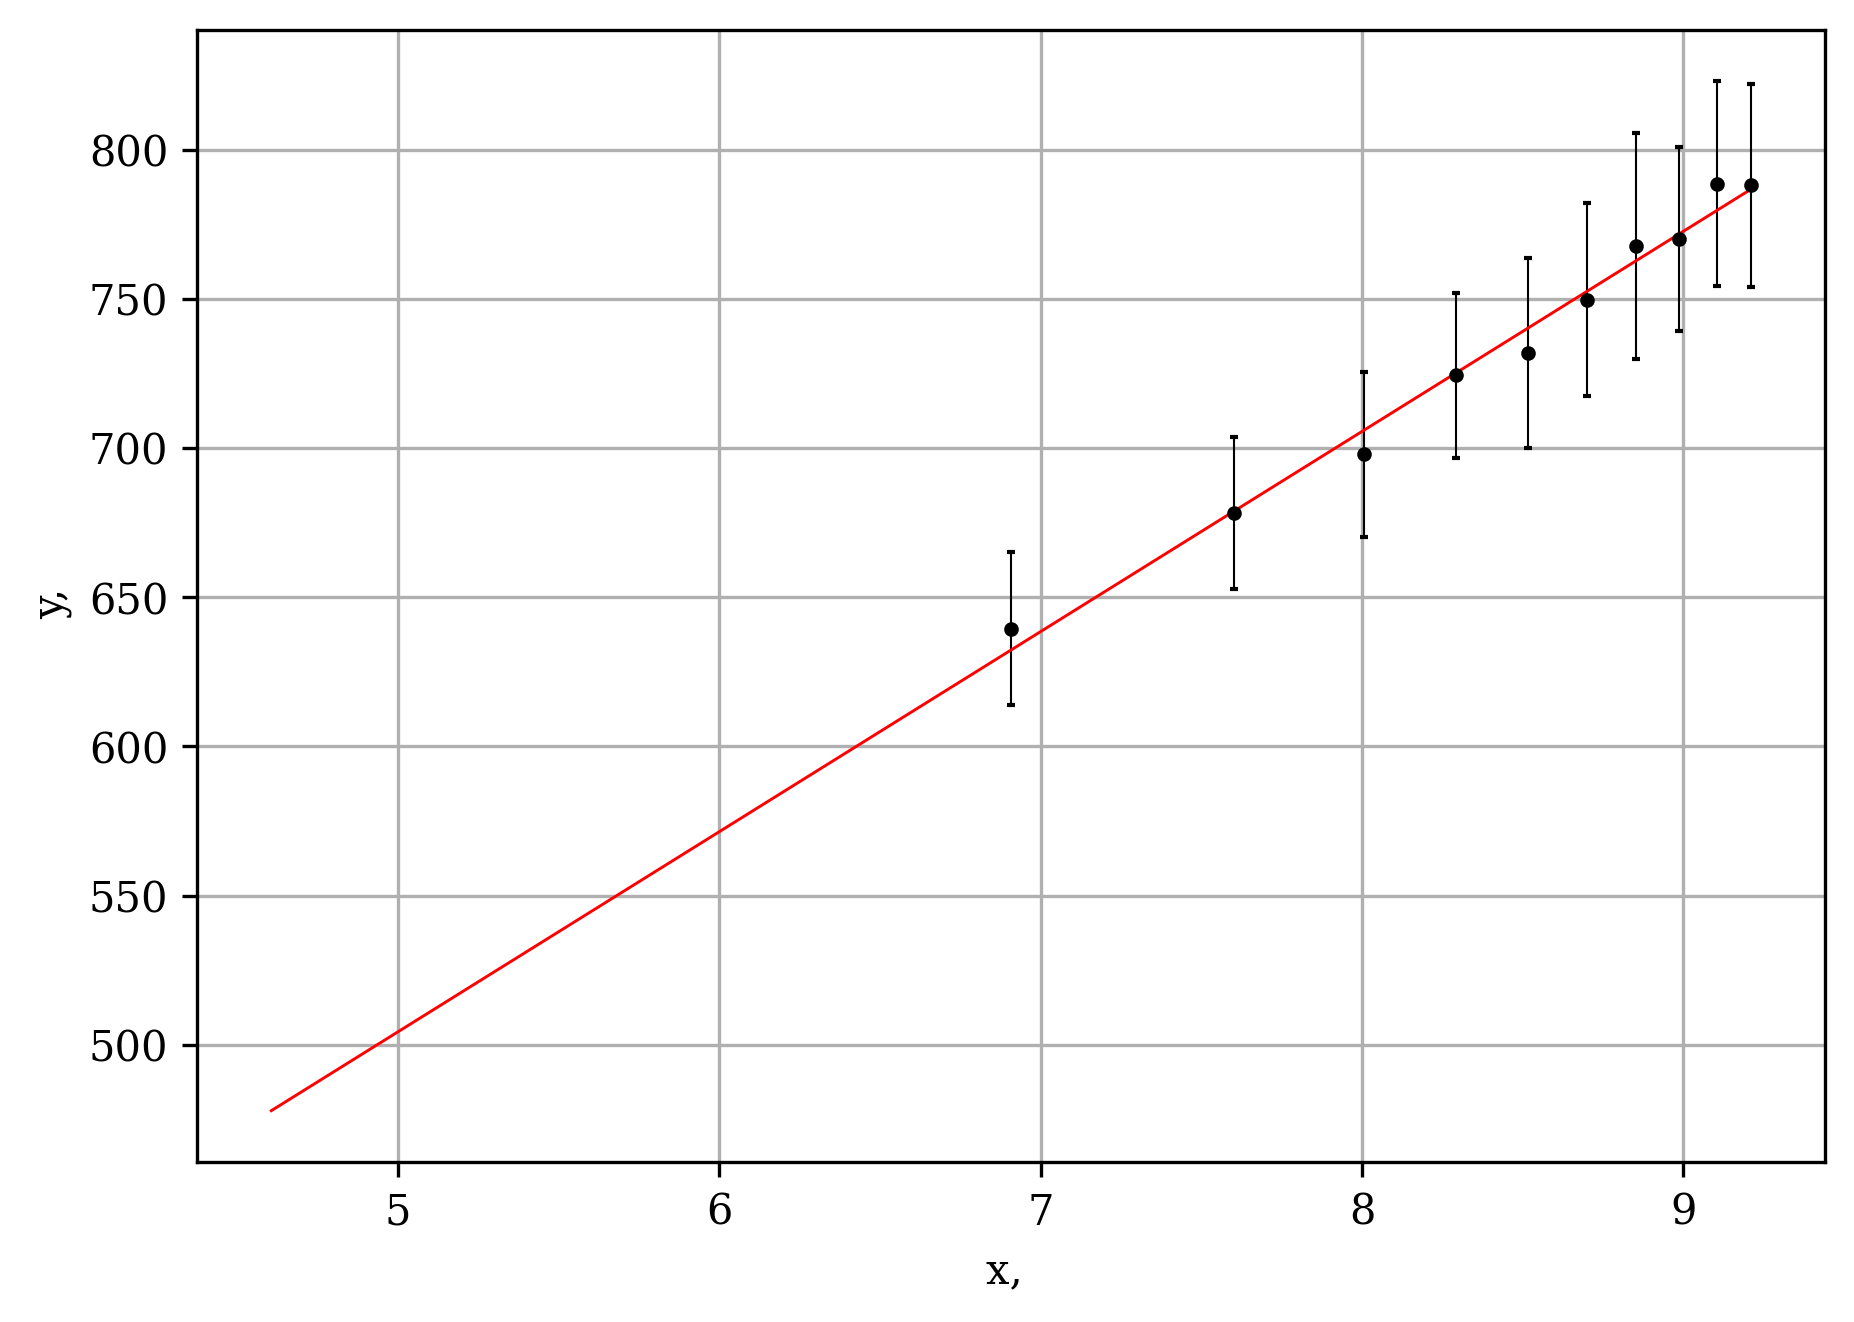

In [106]:
data = pd.read_csv("./binary.txt", sep=";")

def line(x, a, b):
    return a + b*x

y_arr = data['time']
x_arr = np.log(data['N'])
y_err = 0

y_arr = data.groupby(['N']).agg({'time': ['mean', 'std']})['time']['mean']
x_arr = np.log(data.groupby(['N']).agg({'N': 'mean'})['N'])
y_err = data.groupby(['N']).agg({'time': ['mean', 'std']})['time']['std']


right = np.log(1e2)
left = np.log(1e4)

popt, pcov = opt.curve_fit(line, x_arr, y_arr)

plt.figure(figsize=[7,5], dpi=300)
plt.errorbar(x_arr, y_arr, yerr=y_err, ls='', marker='.', color='black', markersize=5, lw=0.5, capsize=1)
plt.plot(np.linspace(right, left, 100), line(np.linspace(right, left, 100), popt[0], popt[1]), lw=0.7, color='red')
plt.ylabel('y, ')
plt.xlabel('x, ')
plt.grid(True)
plt.show()

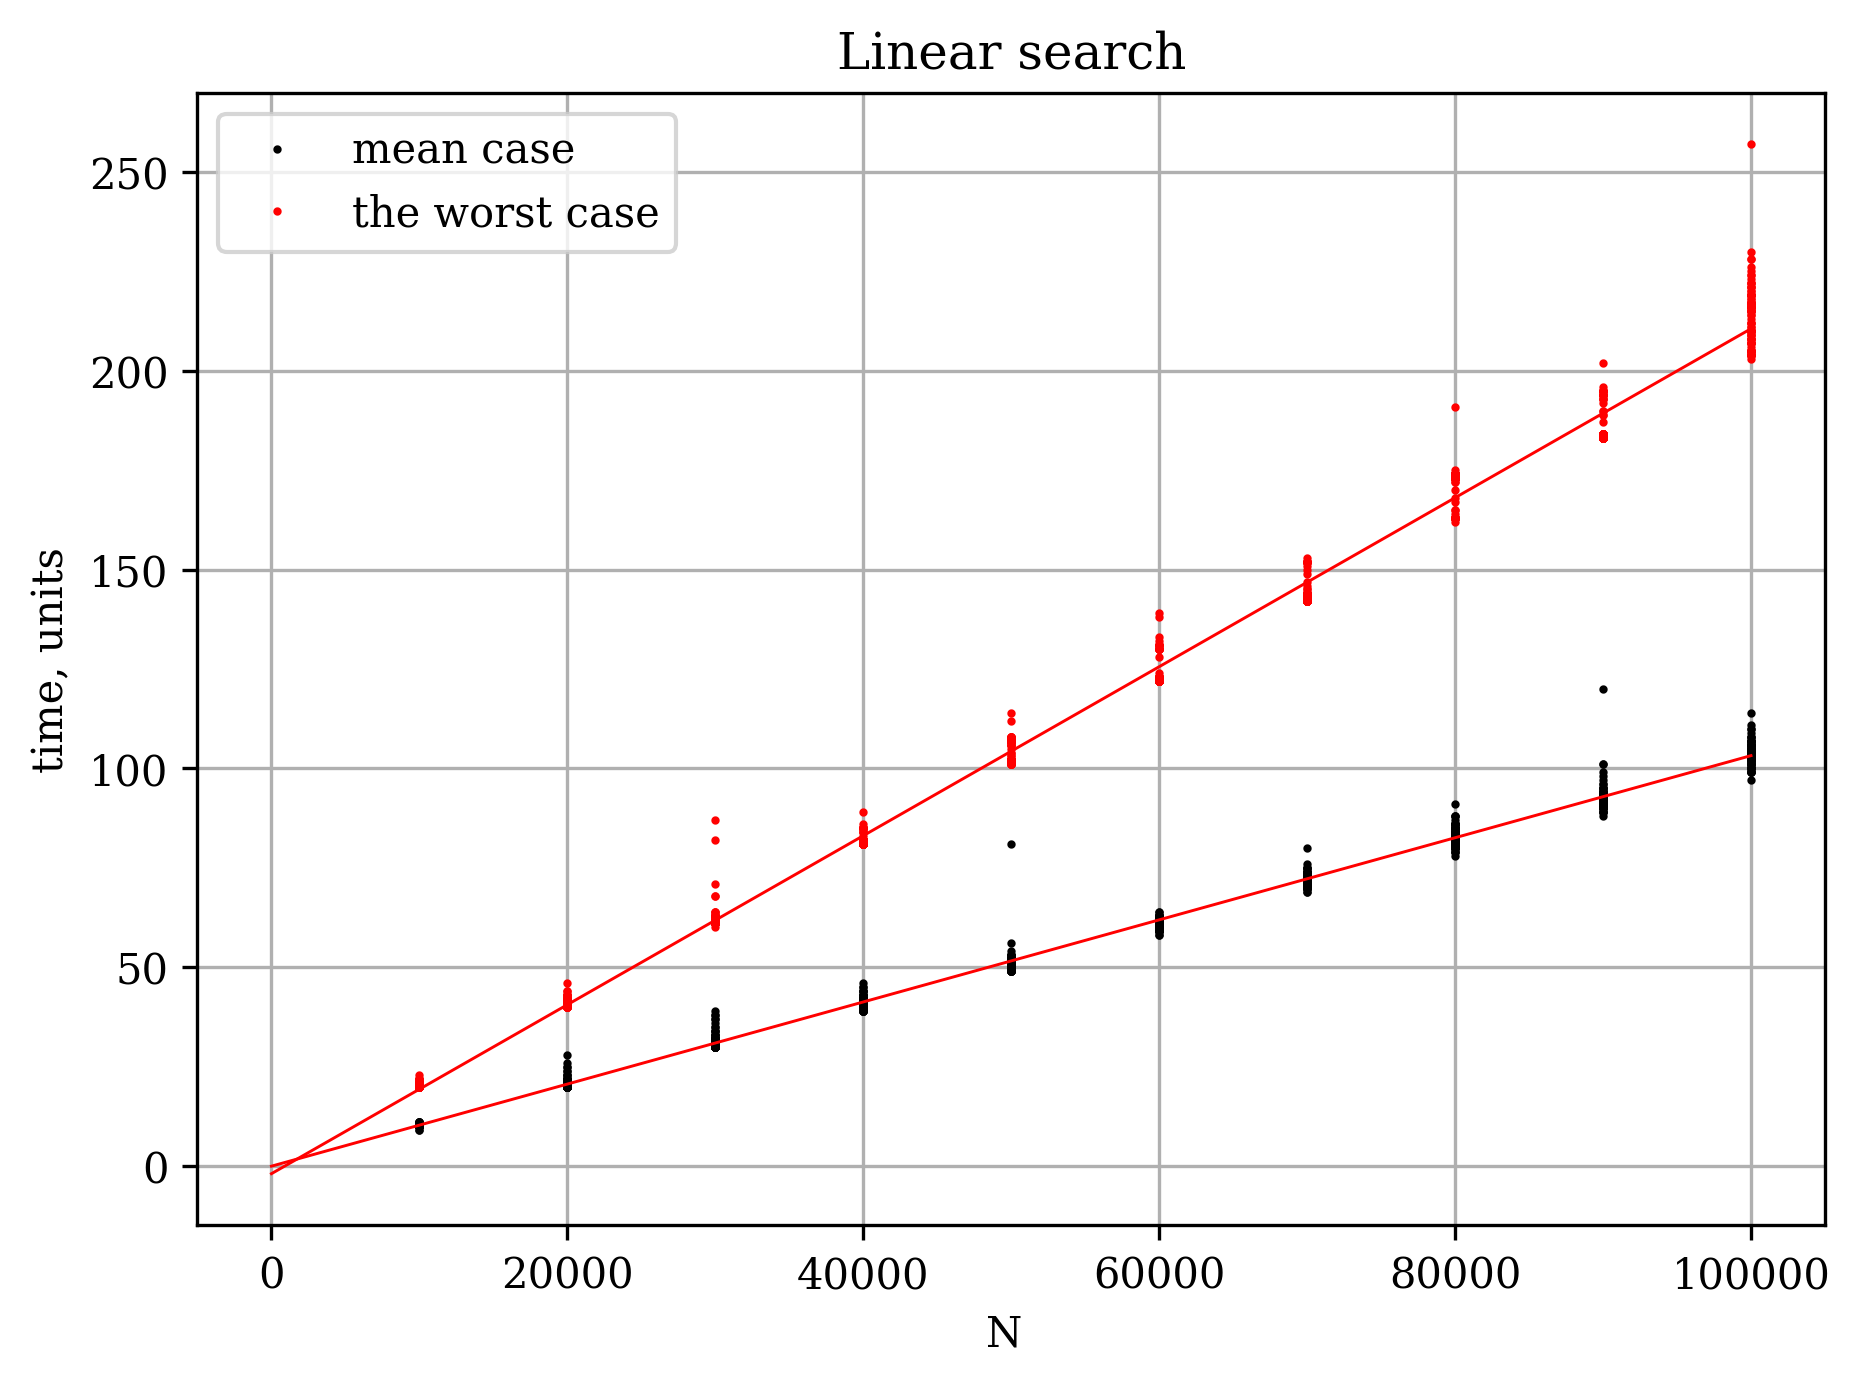

In [96]:
data_l = pd.read_csv("./line.txt", sep=";")
data_l_worst = pd.read_csv("./line_worst.txt", sep=";")

data_b = pd.read_csv("./binary.txt", sep=";")
data_b_worst = pd.read_csv("./binary_worst.txt", sep=";")

def line(x, a, b):
    return a + b*x

y_l_arr = data_l['time']
x_l_arr = data_l['N']
y_lw_arr = data_l_worst['time']
x_lw_arr = data_l_worst['N']

y_b_arr = data_b['time']
x_b_arr = np.log(data_b['N'])
y_bw_arr = data_b_worst['time']
x_bw_arr = np.log(data_b_worst['N'])

# y_arr = data.groupby(['N']).agg({'time': ['mean', 'std']})['time']['mean']
# x_arr = data.groupby(['N']).agg({'N': 'mean'})['N']
# y_err = data.groupby(['N']).agg({'time': ['mean', 'std']})['time']['std']

right_l = 0
left_l = 1e5

right_b = np.log(1e2)
left_b = np.log(1e4)

popt_l, pcov_l = opt.curve_fit(line, x_l_arr, y_l_arr)
popt_lw, pcov_lw = opt.curve_fit(line, x_lw_arr, y_lw_arr)

popt_b, pcov_b = opt.curve_fit(line, x_b_arr, y_b_arr)
popt_bw, pcov_bw = opt.curve_fit(line, x_bw_arr, y_bw_arr)

plt.figure(figsize=[7,5], dpi=300)
plt.plot(np.linspace(right_l, left_l, 100), line(np.linspace(right_l, left_l, 100), popt_l[0], popt_l[1]), lw=0.7, color='red')
plt.plot(x_l_arr, y_l_arr, ls='', marker='.', color='black', markersize=2, label = 'mean case')
plt.plot(np.linspace(right_l, left_l, 100), line(np.linspace(right_l, left_l, 100), popt_lw[0], popt_lw[1]), lw=0.7, color='red')
plt.plot(x_lw_arr, y_lw_arr, ls='', marker='.', color='red', markersize=2, label = 'the worst case')
plt.ylabel('time, units')
plt.xlabel('N ')
plt.legend()
plt.grid(True)
plt.title('Linear search')
plt.show()

plt.figure(figsize=[7,5], dpi=300)
plt.plot(x_b_arr, y_b_arr, ls='', marker='.', color='black', markersize=2, label = 'mean case')
plt.plot(np.linspace(right_b, left_b, 100), line(np.linspace(right_b, left_b, 100), popt_b[0], popt_b[1]), lw=0.7, color='red')
plt.plot(x_bw_arr, y_bw_arr, ls='', marker='.', color='red', markersize=2, label = 'the worst case')
plt.plot(np.linspace(right_b, left_b, 100), line(np.linspace(right_b, left_b, 100), popt_bw[0], popt_bw[1]), lw=0.7, color='red')
plt.ylabel('time, units')
plt.xlabel('log(N)')
plt.legend()
plt.grid(True)
plt.title('Binary search')
plt.show()


#### Сумма двух